In [5]:
import sys
import os
import nibabel as nib
sys.path.append('/home/si-hj/Desktop')
# Visualize a slice of one image
from operator import is_
import matplotlib.pyplot as plt
import os
import nibabel as nib
import torchio as tio
import numpy as np
def pp(label: str, *args, label_width: int = 25, **kwargs):
    print(f"{label:<{label_width}}", *args, **kwargs)

    
print("print working directory")
print(os.getcwd())

img = nib.load("/home/si-hj/Desktop/inference/predictions/braintumour/lowres/downsampled/scale2/Backbone/BRATS_014.nii.gz").get_fdata()
pp("Shape (copied original dataset):", img.shape, label_width=40)


print working directory
/home/si-hj/Desktop/inference
Shape (copied original dataset):         (64, 64, 32)


In [3]:
import sys
import os
import nibabel as nib
sys.path.append('/home/si-hj/Desktop')
# Visualize a slice of one image
from operator import is_
import matplotlib.pyplot as plt
import os
import nibabel as nib
import torchio as tio
import numpy as np
def pp(label: str, *args, label_width: int = 25, **kwargs):
    print(f"{label:<{label_width}}", *args, **kwargs)

    
print("print working directory")
print(os.getcwd())

img = nib.load("../datasets/Task01_BrainTumour/imagesTr/BRATS_039.nii.gz").get_fdata()
pp("Shape (copied original dataset):", img.shape, label_width=40)

# img = nib.load("../datasets/Task01_BrainTumour_test1/fullres/pad/scale0/imagesTr/BRATS_039.nii.gz").get_fdata()
img = nib.load("../datasets/Task01_BrainTumour_test1/fullres/raw/imagesTr/BRATS_039.nii.gz").get_fdata()
pp("Shape (modified dataset):", img.shape, label_width=40)

img = nib.load("../datasets/Task01_BrainTumour_simonnigel/fullres/raw/imagesTr/BRATS_095.nii.gz").get_fdata()
img = img.squeeze()
pp("Shape (nigel):", img.shape, label_width=40)

img = nib.load("../datasets_OG/Task01_BrainTumour/imagesTr/BRATS_039.nii.gz").get_fdata()
pp("Shape (original dataset):", img.shape, label_width=40)

img = nib.load("../datasets_OG/Task01_BrainTumour/imagesTr/BRATS_034.nii.gz").get_fdata()
pp("Shape (original dataset (034)):", img.shape, label_width=40)

print working directory
/home/si-hj/Desktop/inference
Shape (copied original dataset):         (240, 240, 155, 4)
Shape (modified dataset):                (240, 240, 155, 4)


FileNotFoundError: No such file or no access: '../datasets/Task01_BrainTumour_simonnigel/fullres/raw/imagesTr/BRATS_095.nii.gz'

In [ ]:
# count file in directory
def count_files_in_directory(directory: str):
	return len([name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name))])

print(count_files_in_directory("/home/si-hj/Desktop/datasets/Task01_BrainTumour_test1/fullres/pad/scale0/imagesTr"))
print(count_files_in_directory("/home/si-hj/Desktop/datasets/Task01_BrainTumour_test1/fullres/pad/scale0/imagesTs"))

387
97


(4.0, 4.0, 4.0, 1.0)
(64, 64, 32, 4)


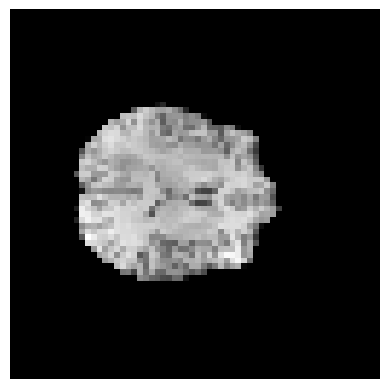

(1.0, 1.0, 1.0, 1.0)
(256, 256, 128, 4)


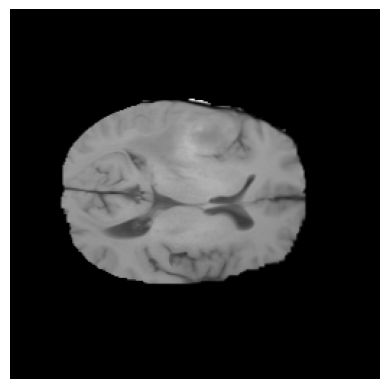

(1.0, 1.0, 1.0, 1.0)
(256, 256, 128, 4)


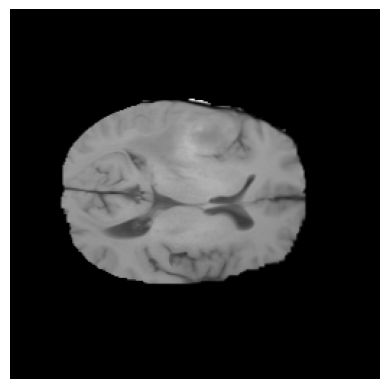

(1.0, 1.0, 1.0, 1.0)
(240, 240, 155, 4)


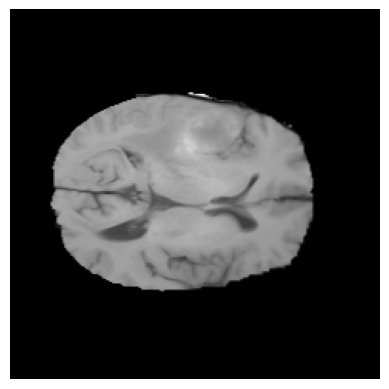

(1.0, 1.0, 1.0, 1.0)
(32, 64, 32, 1)


IndexError: index 1 is out of bounds for axis 3 with size 1

In [ ]:



ToCanonical = tio.ToCanonical()

    

def show_slice(input_path, modality=1):
	# img = nib.load(img).get_fdata().squeeze()
	is_label = False
	if is_label:
		tio_img = tio.LabelMap(input_path)
	else:
		tio_img = tio.ScalarImage(input_path)
	img = ToCanonical(tio_img).data.numpy()
	img = np.moveaxis(img, 0, -1)  # Move the channel dimension to the last position
	
	output_path = "/home/si-hj/Desktop/inference/test.nii.gz"
	nib_image = nib.Nifti1Image(img, tio_img.affine)
	nib.save(nib_image, output_path)

	img = nib.load(output_path)

	print(img.header.get_zooms())
	img = img.get_fdata()

	print(img.shape)

	slice_index = img.shape[2] // 2 
	if img.ndim == 4:
		img = img[:, :, slice_index, modality]  
	elif img.ndim == 3:
		img = img[:, :, slice_index]
	
	plt.imshow(img, cmap='gray', origin='lower')
	plt.axis('off')
	plt.show()


show_slice("/home/si-hj/Desktop/datasets/Task01_BrainTumour_test_999/lowres/downsampled/scale2/imagesTr/BRATS_370.nii.gz")

show_slice("/home/si-hj/Desktop/nn-unet/dataset/MSD/Task01_BrainTumour/imagesTr/BRATS_001.nii.gz")
show_slice("/home/si-hj/Desktop/datasets/Task01_BrainTumour_test1/fullres/pad/scale0/imagesTr/BRATS_001.nii.gz")
show_slice("/home/si-hj/Desktop/datasets/Task01_BrainTumour_test1/fullres/raw/imagesTr/BRATS_001.nii.gz")

show_slice("/home/si-hj/Desktop/nn-unet/dataset/MSD/Task04_Hippocampus/imagesTr/hippocampus_001.nii.gz")
show_slice("/home/si-hj/Desktop/datasets/Task04_Hippocampus_test1/fullres/pad/scale0/imagesTr/hippocampus_001.nii.gz")
show_slice("/home/si-hj/Desktop/datasets/Task04_Hippocampus_test1/fullres/raw/imagesTr/hippocampus_001.nii.gz")


In [ ]:
import torchio as tio
import torch


cp = tio.CropOrPad((128, 128, 128))

x = torch.randn(2, 1, 64, 64, 64)  # Creates a tensor with random values

print(x.shape)
res = torch.zeros((x.shape[0], x.shape[1], 128, 128, 128))  # Preallocate tensor for results
for i in range(x.shape[0]):
	res[i] = cp(x[i])
	print(res.shape)

print(x.shape)


torch.Size([2, 1, 64, 64, 64])
torch.Size([2, 1, 128, 128, 128])
torch.Size([2, 1, 128, 128, 128])
torch.Size([2, 1, 64, 64, 64])


(256, 256, 16)
Axial slices are equal: False
Sagittal slices are equal: False
Coronal slices are equal: False


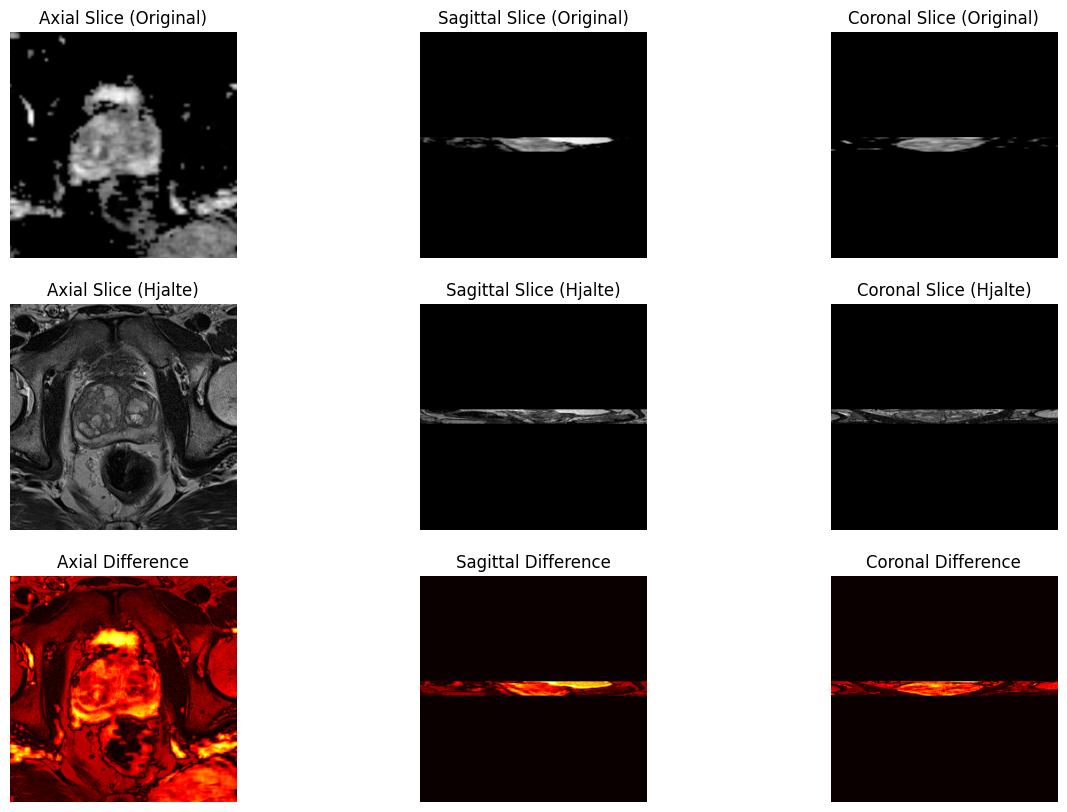

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
#imageOriginal = nib.load("/home/si-hj/Desktop/delete/Task01_BrainTumour/imagesTr/BRATS_112.nii.gz")
#imageOriginal = imageOriginal.get_fdata()
#imageOriginal = imageOriginal.mean(axis=-1)


#imageHjalte = nib.load("/home/si-hj/Desktop/datasets/Task01_BrainTumour_test1/fullres/raw/imagesTs/BRATS_112.nii.gz")
#imageHjalte = imageHjalte.get_fdata()
#imageHjalte = imageHjalte.mean(axis=-1)

imageOriginal = nib.load("/home/si-hj/Desktop/datasets/Task05_Prostate_test1/fullres/pad/scale0/imagesTr/prostate_01.nii.gz")
imageOriginal = imageOriginal.get_fdata()
imageOriginal = imageOriginal[..., 1]

imageHjalte = nib.load("/home/si-hj/Desktop/datasets/Task05_Prostate_test1/fullres/pad/scale0/imagesTr/prostate_01.nii.gz")
imageHjalte = imageHjalte.get_fdata()
imageHjalte = imageHjalte[..., 0]

print(imageOriginal.shape)

def pad_to_shape(img, target_shape):
    pad_y = (target_shape[0] - img.shape[0]) // 2
    pad_x = (target_shape[1] - img.shape[1]) // 2
    return np.pad(img,
                  ((pad_y, target_shape[0] - img.shape[0] - pad_y),
                   (pad_x, target_shape[1] - img.shape[1] - pad_x)),
                  mode='constant')


target_shape = (256, 256)  # or compute max height/width across all images

# Extract slices
axial_original = np.rot90(imageOriginal[:, :, imageOriginal.shape[2] // 2])
axial_hjalte = np.rot90(imageHjalte[:, :, imageHjalte.shape[2] // 2])

sagittal_original = np.rot90(imageOriginal[imageOriginal.shape[0] // 2, :, :])
sagittal_hjalte = np.rot90(imageHjalte[imageHjalte.shape[0] // 2, :, :])

coronal_original = np.rot90(imageOriginal[:, imageOriginal.shape[1] // 2, :])
coronal_hjalte = np.rot90(imageHjalte[:, imageHjalte.shape[1] // 2, :])

# Compute differences
axial_diff = np.abs(axial_original - axial_hjalte)
sagittal_diff = np.abs(sagittal_original - sagittal_hjalte)
coronal_diff = np.abs(coronal_original - coronal_hjalte)

# Check equality
axial_equal = np.array_equal(axial_original, axial_hjalte)
sagittal_equal = np.array_equal(sagittal_original, sagittal_hjalte)
coronal_equal = np.array_equal(coronal_original, coronal_hjalte)


axial_original = pad_to_shape(axial_original, target_shape)
axial_hjalte = pad_to_shape(axial_hjalte, target_shape)
axial_diff = pad_to_shape(axial_diff, target_shape)

sagittal_original = pad_to_shape(sagittal_original, target_shape)
sagittal_hjalte = pad_to_shape(sagittal_hjalte, target_shape)
sagittal_diff = pad_to_shape(sagittal_diff, target_shape)

coronal_original = pad_to_shape(coronal_original, target_shape)
coronal_hjalte = pad_to_shape(coronal_hjalte, target_shape)
coronal_diff = pad_to_shape(coronal_diff, target_shape)


# Print results
print("Axial slices are equal:", axial_equal)
print("Sagittal slices are equal:", sagittal_equal)
print("Coronal slices are equal:", coronal_equal)

plt.figure(figsize=(15, 10))

# Visualize slices
plt.subplot(3, 3, 1)
plt.imshow(axial_original, cmap='gray')
plt.title('Axial Slice (Original)')
plt.axis('off')
plt.subplot(3, 3, 2)
plt.imshow(sagittal_original, cmap='gray')
plt.title('Sagittal Slice (Original)')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(coronal_original, cmap='gray')
plt.title('Coronal Slice (Original)')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.imshow(axial_hjalte, cmap='gray')
plt.title('Axial Slice (Hjalte)')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(sagittal_hjalte, cmap='gray')
plt.title('Sagittal Slice (Hjalte)')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(coronal_hjalte, cmap='gray')
plt.title('Coronal Slice (Hjalte)')
plt.axis('off')

# Visualize differences
plt.subplot(3, 3, 7)
plt.imshow(axial_diff, cmap='hot')
plt.title('Axial Difference')
plt.axis('off')

plt.subplot(3, 3, 8)
plt.imshow(sagittal_diff, cmap='hot')
plt.title('Sagittal Difference')
plt.axis('off')

plt.subplot(3, 3, 9)
plt.imshow(coronal_diff, cmap='hot')
plt.title('Coronal Difference')
plt.axis('off')


plt.gca().set_aspect('equal') 
plt.show()


## <span style="color:rgba(255, 0, 0, 0.83)">**Data Augmentation**</span>
### <span>**Our own library**</style>


torch.Size([4, 240, 240, 155])


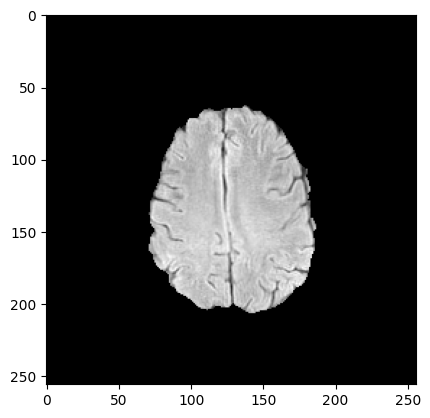

In [23]:
import torch
import sys
sys.path.append('/home/si-hj/Desktop/medsegnet')

from transforms.compose import Compose
from transforms.intensity.random_noise import RandomNoise
from transforms.spatial.pad_crop import PadCrop



img = nib.load("../datasets_OG/Task01_BrainTumour/imagesTr/BRATS_039.nii.gz").get_fdata()
img = np.moveaxis(img, -1, 0)

pipeline = Compose([
    RandomNoise(p=1, std=0.1),
    PadCrop((256, 256, 128)),
])

img = np.rot90(img, axes=(1, 2)).copy()
img = torch.tensor(img, dtype=torch.float32)
print(img.shape)


img, mask = pipeline(img)
img = img[0, :, :, 90]
plt.imshow(img, cmap='gray')

In [ ]:
import torch

x = torch.randn(1, 1, 4, requires_grad=True)

ms_gate_weight = torch.randn(4, 4, requires_grad=True)

main_path_output = x * 2

x_detached = x.detach()
ms_path_output = (x_detached @ ms_gate_weight) * 3

total_loss = main_path_output.sum() + ms_path_output.sum()

print(f"Does total_loss require grad? {total_loss.requires_grad}")
print(f"Does total_loss have a grad_fn? {total_loss.grad_fn is not None}")

total_loss.backward()

print("\n--- Gradients ---")
print(f"Gradient for x:\n{x.grad}")

print(f"Gradient for ms_gate_weight:\n{ms_gate_weight.grad}")


assert total_loss.grad_fn is not None, "Backward failed because loss has no history!"
assert x.grad is not None, "x should have a gradient from the main path!"
assert ms_gate_weight.grad is not None, "MS Gate should have a gradient!"
print("\nSuccess! .backward() worked because of the parallel, non-detached path.")

Does total_loss require grad? True
Does total_loss have a grad_fn? True

--- Gradients ---
Gradient for x:
tensor([[[2., 2., 2., 2.]]])
Gradient for ms_gate_weight:
tensor([[-0.5946, -0.5946, -0.5946, -0.5946],
        [-1.3290, -1.3290, -1.3290, -1.3290],
        [ 2.2692,  2.2692,  2.2692,  2.2692],
        [-2.7145, -2.7145, -2.7145, -2.7145]])

Success! .backward() worked because of the parallel, non-detached path.
